In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir(os.path.dirname(os.getcwd()))

In [3]:
with open('Results/venus_2023.txt') as f:
    pred_coordinates = np.empty((0, 3))
    lines = f.readlines()
    for line in lines:
        pred_coordinates = np.vstack((pred_coordinates, np.array(line.split()).astype(np.float128)))

target_coordinates = np.empty((0, 3))

with open('RawData/horizons_results_target.csv') as f:
    for line in f:
        line = line.strip().split(',')
        position = np.array(list(map(np.float128, line)))
        target_coordinates = np.vstack((target_coordinates, position))

target_coordinates = target_coordinates[:len(pred_coordinates)]

In [4]:
#Error Analysis
diff = np.abs(target_coordinates - pred_coordinates)
max_error = np.max(diff, axis=0)
mean_error = np.mean(diff, axis=0)
std_error = np.std(diff, axis=0)

print(f'Max Error: {max_error/149597870.7} AU')
print(f'Mean Error: {mean_error/149597870.7} AU')
print(f'Std Error/Deviation: {std_error/149597870.7} AU')

Max Error: [0.45991843 0.45388669 0.01895663] AU
Mean Error: [0.2875112  0.28765882 0.01165386] AU
Std Error/Deviation: [0.1400108  0.13975348 0.00572812] AU


In [5]:
mean_squared_error = np.mean(np.sum(diff**2, axis=1))
root_mean_squared_error = np.sqrt(mean_squared_error)
mean_absolute_error = np.mean(np.sum(diff, axis=1))

print(f'Mean Squared Error: {mean_squared_error/(149597870.7**2)} AU^2')
print(f'Root Mean Squared Error: {root_mean_squared_error/149597870.7} AU')
print(f'Mean Absolute Error: {mean_absolute_error/149597870.7} AU')

Mean Squared Error: 0.20471296912808973 AU^2
Root Mean Squared Error: 0.4524521733046375 AU
Mean Absolute Error: 0.5868238796874702 AU


In [6]:
#Axis-wise Error Analysis
diff_x = np.abs(target_coordinates[:, 0] - pred_coordinates[:, 0])
diff_y = np.abs(target_coordinates[:, 1] - pred_coordinates[:, 1])
diff_z = np.abs(target_coordinates[:, 2] - pred_coordinates[:, 2])

max_error_x = np.max(diff_x)
mean_error_x = np.mean(diff_x)
std_error_x = np.std(diff_x)

max_error_y = np.max(diff_y)
mean_error_y = np.mean(diff_y)
std_error_y = np.std(diff_y)

max_error_z = np.max(diff_z)
mean_error_z = np.mean(diff_z)
std_error_z = np.std(diff_z)

mean_squared_error_x = np.mean(diff_x**2)
mean_squared_error_y = np.mean(diff_y**2)
mean_squared_error_z = np.mean(diff_z**2)

root_mean_squared_error_x = np.sqrt(mean_squared_error_x)
root_mean_squared_error_y = np.sqrt(mean_squared_error_y)
root_mean_squared_error_z = np.sqrt(mean_squared_error_z)

mean_absolute_error_x = np.mean(diff_x)
mean_absolute_error_y = np.mean(diff_y)
mean_absolute_error_z = np.mean(diff_z)

print(f'X-Axis Error Analysis')
print(f'Max Error: {max_error_x/149597870.7} AU')
print(f'Mean Error: {mean_error_x/149597870.7} AU')
print(f'Std Error/Deviation: {std_error_x/149597870.7} AU')
print(f'Mean Squared Error: {mean_squared_error_x/(149597870.7**2)} AU^2')
print(f'Root Mean Squared Error: {root_mean_squared_error_x/149597870.7} AU')
print(f'Mean Absolute Error: {mean_absolute_error_x/149597870.7} AU')

print(f'\nY-Axis Error Analysis')
print(f'Max Error: {max_error_y/149597870.7} AU')
print(f'Mean Error: {mean_error_y/149597870.7} AU')
print(f'Std Error/Deviation: {std_error_y/149597870.7} AU')
print(f'Mean Squared Error: {mean_squared_error_y/(149597870.7**2)} AU^2')
print(f'Root Mean Squared Error: {root_mean_squared_error_y/149597870.7} AU')
print(f'Mean Absolute Error: {mean_absolute_error_y/149597870.7} AU')

print(f'\nZ-Axis Error Analysis')
print(f'Max Error: {max_error_z/149597870.7} AU')
print(f'Mean Error: {mean_error_z/149597870.7} AU')
print(f'Std Error/Deviation: {std_error_z/149597870.7} AU')
print(f'Mean Squared Error: {mean_squared_error_z/(149597870.7**2)} AU^2')
print(f'Root Mean Squared Error: {root_mean_squared_error_z/149597870.7} AU')
print(f'Mean Absolute Error: {mean_absolute_error_z/149597870.7} AU')

X-Axis Error Analysis
Max Error: 0.4599184329296383 AU
Mean Error: 0.2875112043377772 AU
Std Error/Deviation: 0.14001079945512832 AU
Mean Squared Error: 0.10226571658382323 AU^2
Root Mean Squared Error: 0.31979011333032675 AU
Mean Absolute Error: 0.2875112043377772 AU

Y-Axis Error Analysis
Max Error: 0.4538866939184479 AU
Mean Error: 0.28765881664543114 AU
Std Error/Deviation: 0.13975347551538536 AU
Mean Squared Error: 0.10227862871247916 AU^2
Root Mean Squared Error: 0.3198103011356563 AU
Mean Absolute Error: 0.28765881664543114 AU

Z-Axis Error Analysis
Max Error: 0.018956634819097685 AU
Mean Error: 0.011653858704261909 AU
Std Error/Deviation: 0.005728124395334783 AU
Mean Squared Error: 0.00016862383178733052 AU^2
Root Mean Squared Error: 0.012985523931953248 AU
Mean Absolute Error: 0.011653858704261909 AU


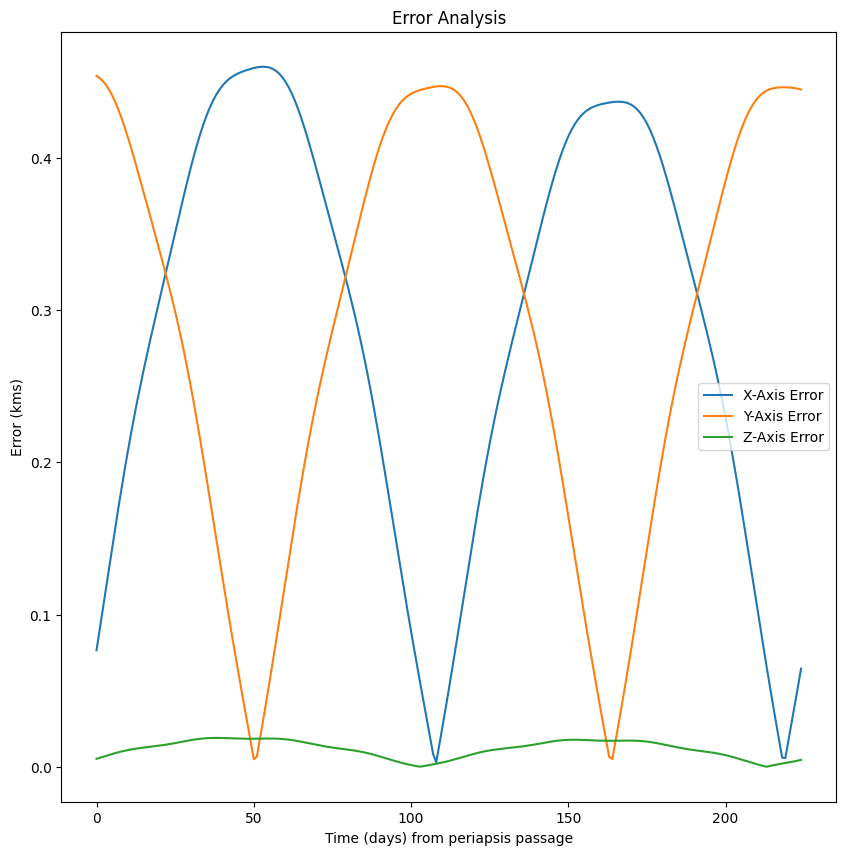

In [8]:
#Error Visualization
plt.figure(figsize=(10, 10))
plt.plot(diff_x/149597870.7, label='X-Axis Error')
plt.plot(diff_y/149597870.7, label='Y-Axis Error')
plt.plot(diff_z/149597870.7, label='Z-Axis Error')
plt.title('Error Analysis')
plt.xlabel('Time (days) from periapsis passage')
plt.ylabel('Error (kms)')
plt.legend()
plt.show()